In [1]:
% matplotlib inline
# % config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle
from scipy.interpolate import interp1d

from limlam_mocker import limlam_mocker as llm
#Get Parameters for run
from limlam_mocker import params        as params

import lnn as lnn

### load in models
from models_to_load import *

np.random.seed(1337)

%load_ext autoreload

In [40]:
%autoreload
# %autoreload 0
#%autoreload 2

# Setup Learning Enviornment


In [9]:
import tensorflow as tf
from tensorflow import keras

mapLoc = '../maps2/basic_Li/'
mapLoc_noise = '../maps2/random_Li/'
random_small_Li_mapLoc = '../maps2/random_small_Li/'
catLoc = '../catalogues2/'
modelLoc = '../models2/'
modelLoc2 = '../models3/'

### map info
numb_maps = 100
pix_x = 256
pix_y = 256

### output info
lum_func_size = 49

# Load Power Spectrum Results

In [4]:
def load_power_data(file_name):
    data = np.loadtxt(file_name, delimiter=',')
    lum = sorted(data[:,0])
    phi = list(sorted(data[:,1], reverse=True))
    return(lum, phi)

def interpolate_power_data(lum, phi, min_val, max_val):
    f = interp1d(lum, phi)
    
    new_lum = np.logspace(min_val,max_val,50)
    new_phi = f(new_lum)
    
    return(new_lum, new_phi)

In [5]:
file_upper = 'comap_power_data/upper_limit.txt'
file_lower = 'comap_power_data/lower_limit.txt'
file_simulated = 'comap_power_data/underlying.txt'

upper_lum, upper_phi = load_power_data(file_upper)
lower_lum, lower_phi = load_power_data(file_lower)
simulated_lum, simulated_phi = load_power_data(file_simulated)

min_val = np.log10(max([upper_lum[0], lower_lum[0], simulated_lum[0]]))
max_val = np.log10(min([upper_lum[-1], lower_lum[-1], simulated_lum[-1]]))

upper_lum, upper_phi = interpolate_power_data(upper_lum, upper_phi, min_val, max_val)
lower_lum, lower_phi = interpolate_power_data(lower_lum, lower_phi, min_val, max_val)
simulated_lum, simulated_phi = interpolate_power_data(simulated_lum, simulated_phi, min_val, max_val)

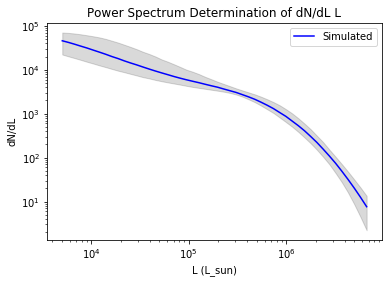

In [6]:
plt.loglog(simulated_lum, simulated_phi * 10**6.3342749483296803, c='b', label='Simulated')
plt.fill_between(upper_lum, lower_phi * 10**6.3342749483296803, upper_phi * 10**6.3342749483296803, alpha=0.15, color='k')

plt.xlabel('L (L_sun)')
plt.ylabel('dN/dL')
plt.title('Power Spectrum Determination of dN/dL L')
plt.legend()

plt.show()

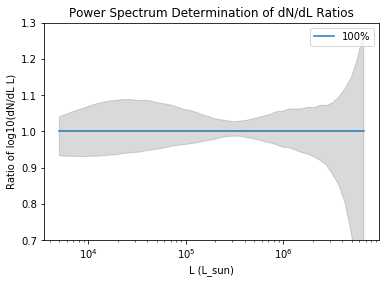

In [7]:
upper_ratio = np.log10(upper_phi * 10**6.3342749483296803)/np.log10(simulated_phi * 10**6.3342749483296803)
lower_ratio = np.log10(lower_phi * 10**6.3342749483296803)/np.log10(simulated_phi * 10**6.3342749483296803)
simulated_ratio = np.log10(simulated_phi * 10**6.3342749483296803)/np.log10(simulated_phi * 10**6.3342749483296803)
real_space_upper_ratio = upper_phi/simulated_phi
real_space_lower_ratio = lower_phi/simulated_phi

plt.semilogx(simulated_lum, simulated_ratio, label='100%')
# plt.semilogx(simulated_lum, upper_ratio, label='Upper Error')
# plt.semilogx(simulated_lum, lower_ratio, label='Lower Error')
plt.fill_between(simulated_lum, lower_ratio, upper_ratio, alpha=0.15, color='k')

plt.ylim([0.7, 1.3])
plt.xlabel('L (L_sun)')
plt.ylabel('Ratio of log10(dN/dL L)')
plt.title('Power Spectrum Determination of dN/dL Ratios')
plt.legend()


plt.show()

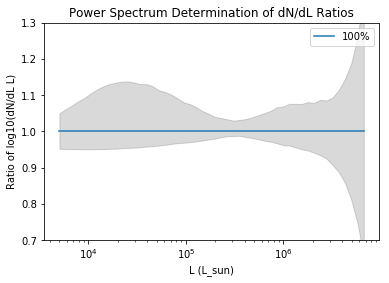

In [8]:
upper_ratio2 = 1+(upper_phi - simulated_phi)/simulated_phi/np.log(10)/np.log10(simulated_phi * 10**6.3342749483296803)
lower_ratio2 = 1-(simulated_phi - lower_phi)/simulated_phi/np.log(10)/np.log10(simulated_phi * 10**6.3342749483296803)

plt.semilogx(simulated_lum, simulated_ratio, label='100%')
plt.fill_between(simulated_lum, lower_ratio2, upper_ratio2, alpha=0.15, color='k')

plt.ylim([0.7, 1.3])
plt.xlabel('L (L_sun)')
plt.ylabel('Ratio of log10(dN/dL L)')
plt.title('Power Spectrum Determination of dN/dL Ratios')
plt.legend()


plt.show()

# Load Maps

In [10]:
subFields = lnn.loadBaseFNames(mapLoc)
base = [mapLoc + s for s in subFields]

subFields_noise = lnn.loadBaseFNames(mapLoc_noise)
base_noise = [mapLoc_noise + s for s in subFields_noise]

subFields_small = lnn.loadBaseFNames(random_small_Li_mapLoc)
base_small = [random_small_Li_mapLoc + s for s in subFields_small]

lumLogBinCents = lnn.loadData(base[152] + '_lum.npz')['logBinCent']

# Load Models

In [17]:
log_lum_full_in_6_layer_kernel_3_2D = get_master_(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_kernel_3_2D',
                                train_number=1,
                                droprate=0.2, numb_layers=6, base_filters=32, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

../models3/log_lum_full_in_6_layer_kernel_3_2D_weights_1.hdf5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 254, 254, 32)      28832     
_________________________________________________________________
batch_normalization_24 (Batc (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 127, 127, 32)      4128      
_________________________________________________________________
dropout_24 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_25 (Batc (None, 125, 125, 64)      256       
_________________________________________________________________
conv2d_51 (Con

In [18]:
log_lum_full_in_6_layer_kernel_3_2D_64_filters = get_master_(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_kernel_3_2D_64_filters',
                                train_number=1,
                                droprate=0.2, numb_layers=6, base_filters=64, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

../models3/log_lum_full_in_6_layer_kernel_3_2D_64_filters_weights_1.hdf5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 254, 254, 64)      57664     
_________________________________________________________________
batch_normalization_30 (Batc (None, 254, 254, 64)      256       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 127, 127, 64)      16448     
_________________________________________________________________
dropout_30 (Dropout)         (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 125, 125, 128)     73856     
_________________________________________________________________
batch_normalization_31 (Batc (None, 125, 125, 128)     512       
_________________________________________________________________
con

In [19]:
log_lum_full_in_6_layer_kernel_3_2D_random_Li = get_master_(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_kernel_3_2D_random_Li',
                                train_number=1,
                                droprate=0.2, numb_layers=6, base_filters=32, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

../models3/log_lum_full_in_6_layer_kernel_3_2D_random_Li_weights_1.hdf5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 254, 254, 32)      28832     
_________________________________________________________________
batch_normalization_36 (Batc (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 127, 127, 32)      4128      
_________________________________________________________________
dropout_36 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_37 (Batc (None, 125, 125, 64)      256       
_________________________________________________________________
conv

In [20]:
log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li = get_master_(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li',
                                train_number=1,
                                droprate=0.2, numb_layers=6, base_filters=32, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

../models3/log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_weights_1.hdf5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 254, 254, 32)      28832     
_________________________________________________________________
batch_normalization_42 (Batc (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 127, 127, 32)      4128      
_________________________________________________________________
dropout_42 (Dropout)         (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_43 (Batc (None, 125, 125, 64)      256       
___________________________________________________________

In [11]:
adam_test7 = get_master_adam(modelLoc2, 64, 64, 10, lum_func_size,
                                extra_file_name='', file_name='adam_test7',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=6, base_filters=64, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=True)

# Get Variance of Model

In [21]:
bases = np.arange(100, 140)

In [24]:
log_lum_full_in_6_layer_kernel_3_2D_res = lnn.get_model_ratios(log_lum_full_in_6_layer_kernel_3_2D, base, bases)
log_lum_full_in_6_layer_kernel_3_2D_64_filters_res = lnn.get_model_ratios(log_lum_full_in_6_layer_kernel_3_2D_64_filters, base, bases)
log_lum_full_in_6_layer_kernel_3_2D_random_Li_res = lnn.get_model_ratios(log_lum_full_in_6_layer_kernel_3_2D_random_Li, base, bases)
log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_res = lnn.get_model_ratios(log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li, base, bases)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:473: RuntimeWarning: divide by zero encountered in true_divide
  ratio_of_lums[i] = (temp_cnn_lum/temp_sim_lum)[0]


In [25]:
log_lum_full_in_6_layer_kernel_3_2D_std = lnn.std_of_model(log_lum_full_in_6_layer_kernel_3_2D_res[2])
log_lum_full_in_6_layer_kernel_3_2D_64_filters_std = lnn.std_of_model(log_lum_full_in_6_layer_kernel_3_2D_64_filters_res[2])
log_lum_full_in_6_layer_kernel_3_2D_random_Li_std = lnn.std_of_model(log_lum_full_in_6_layer_kernel_3_2D_random_Li_res[2])
log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_std = lnn.std_of_model(log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_res[2])

In [26]:
log_lum_full_in_6_layer_kernel_3_2D_noise_res = lnn.get_model_ratios(log_lum_full_in_6_layer_kernel_3_2D, base_noise, bases)
log_lum_full_in_6_layer_kernel_3_2D_64_filters_noise_res = lnn.get_model_ratios(log_lum_full_in_6_layer_kernel_3_2D_64_filters, base_noise, bases)
log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_res = lnn.get_model_ratios(log_lum_full_in_6_layer_kernel_3_2D_random_Li, base_noise, bases)
log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_noise_res = lnn.get_model_ratios(log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li, base_noise, bases)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:473: RuntimeWarning: divide by zero encountered in true_divide
  ratio_of_lums[i] = (temp_cnn_lum/temp_sim_lum)[0]


In [27]:
log_lum_full_in_6_layer_kernel_3_2D_noise_std = lnn.std_of_model(log_lum_full_in_6_layer_kernel_3_2D_noise_res[2])
log_lum_full_in_6_layer_kernel_3_2D_64_filters_noise_std = lnn.std_of_model(log_lum_full_in_6_layer_kernel_3_2D_64_filters_noise_res[2])
log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std = lnn.std_of_model(log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_res[2])
log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_noise_std = lnn.std_of_model(log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_noise_res[2])

In [37]:
base_numbers = np.random.choice(range(len(base_small)), 400)
adam_test7_res = lnn.get_model_ratios(adam_test7, base_small, base_numbers, threeD=True, log_input=True, pre_pool=4,
                                     pre_pool_z=10)
adam_test7_std = lnn.std_of_model(adam_test7_res[2])

# Compare STDs

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:495: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(model_lums[0], model_lowers[0]/model_lowers[0], label='100%')


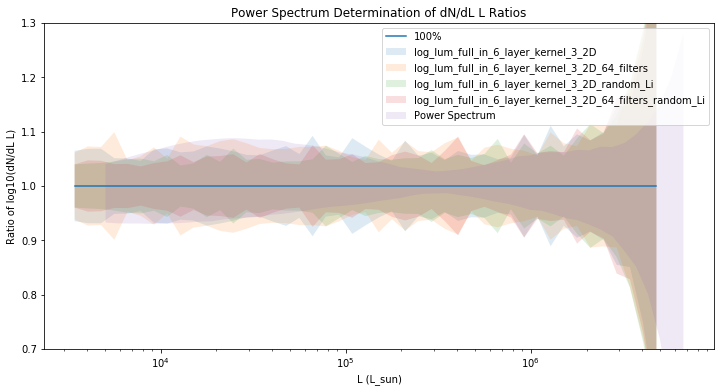

In [28]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D', 'log_lum_full_in_6_layer_kernel_3_2D_64_filters', 
                'log_lum_full_in_6_layer_kernel_3_2D_random_Li', 'log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li', 
                'Power Spectrum']
model_lowers = [log_lum_full_in_6_layer_kernel_3_2D_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_std, 
                log_lum_full_in_6_layer_kernel_3_2D_random_Li_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_std, 
                (1-lower_ratio)/2]
model_uppers = [log_lum_full_in_6_layer_kernel_3_2D_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_std, 
                log_lum_full_in_6_layer_kernel_3_2D_random_Li_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_std, 
                (upper_ratio-1)/2]
model_lums = [lumLogBinCents, lumLogBinCents, lumLogBinCents, lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:495: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(model_lums[0], model_lowers[0]/model_lowers[0], label='100%')


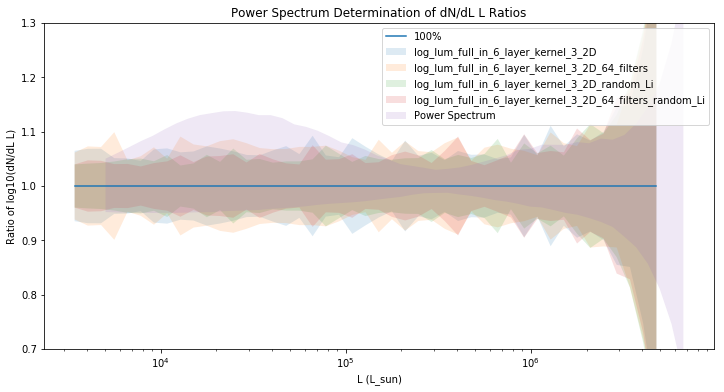

In [29]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D', 'log_lum_full_in_6_layer_kernel_3_2D_64_filters', 
                'log_lum_full_in_6_layer_kernel_3_2D_random_Li', 'log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li', 
                'Power Spectrum']
model_lowers = [log_lum_full_in_6_layer_kernel_3_2D_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_std, 
                log_lum_full_in_6_layer_kernel_3_2D_random_Li_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_std, 
                (1-lower_ratio2)/2]
model_uppers = [log_lum_full_in_6_layer_kernel_3_2D_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_std, 
                log_lum_full_in_6_layer_kernel_3_2D_random_Li_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_std, 
                (upper_ratio2-1)/2]
model_lums = [lumLogBinCents, lumLogBinCents, lumLogBinCents, lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:495: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(model_lums[0], model_lowers[0]/model_lowers[0], label='100%')


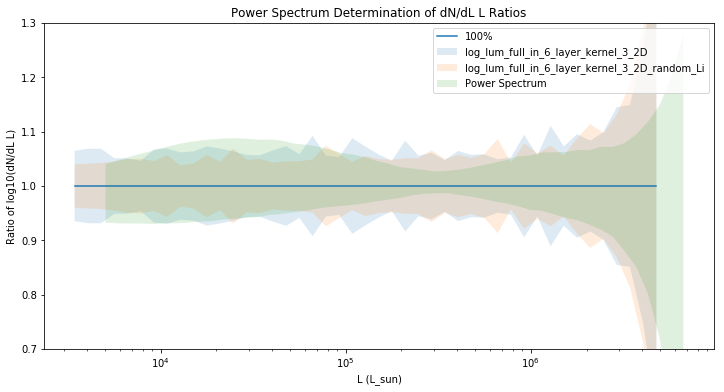

In [31]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D', 'log_lum_full_in_6_layer_kernel_3_2D_random_Li', 
                'Power Spectrum']
model_lowers = [log_lum_full_in_6_layer_kernel_3_2D_std, log_lum_full_in_6_layer_kernel_3_2D_random_Li_std, 
                (1-lower_ratio)/2]
model_uppers = [log_lum_full_in_6_layer_kernel_3_2D_std, log_lum_full_in_6_layer_kernel_3_2D_random_Li_std, 
                (upper_ratio-1)/2]
model_lums = [lumLogBinCents, lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:495: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(model_lums[0], model_lowers[0]/model_lowers[0], label='100%')


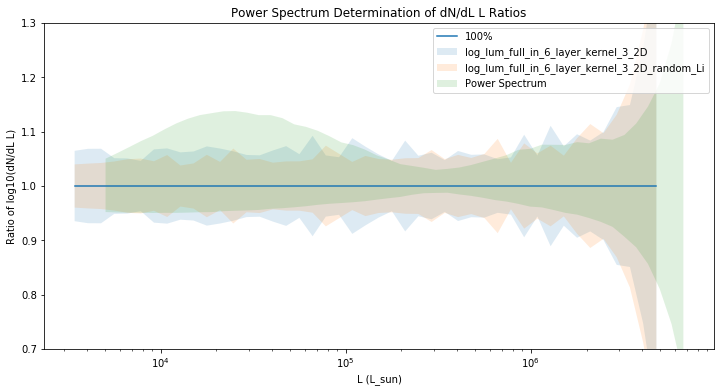

In [30]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D', 'log_lum_full_in_6_layer_kernel_3_2D_random_Li', 
                'Power Spectrum']
model_lowers = [log_lum_full_in_6_layer_kernel_3_2D_std, log_lum_full_in_6_layer_kernel_3_2D_random_Li_std, 
                (1-lower_ratio2)/2]
model_uppers = [log_lum_full_in_6_layer_kernel_3_2D_std, log_lum_full_in_6_layer_kernel_3_2D_random_Li_std, 
                (upper_ratio2-1)/2]
model_lums = [lumLogBinCents, lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:495: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(model_lums[0], model_lowers[0]/model_lowers[0], label='100%')


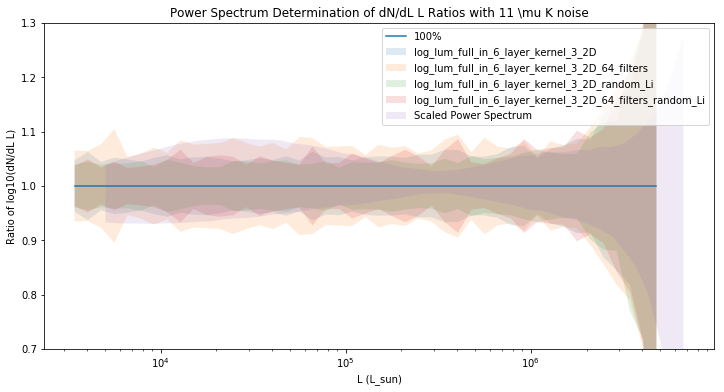

In [32]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D', 'log_lum_full_in_6_layer_kernel_3_2D_64_filters', 
                'log_lum_full_in_6_layer_kernel_3_2D_random_Li', 'log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li', 
                'Scaled Power Spectrum']
model_lowers = [log_lum_full_in_6_layer_kernel_3_2D_noise_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_noise_std, 
                log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_noise_std, 
                (1-lower_ratio)/2]
model_uppers = [log_lum_full_in_6_layer_kernel_3_2D_noise_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_noise_std, 
                log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_noise_std, 
                (upper_ratio-1)/2]
model_lums = [lumLogBinCents, lumLogBinCents, lumLogBinCents, lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums, white_noise=11)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:495: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(model_lums[0], model_lowers[0]/model_lowers[0], label='100%')


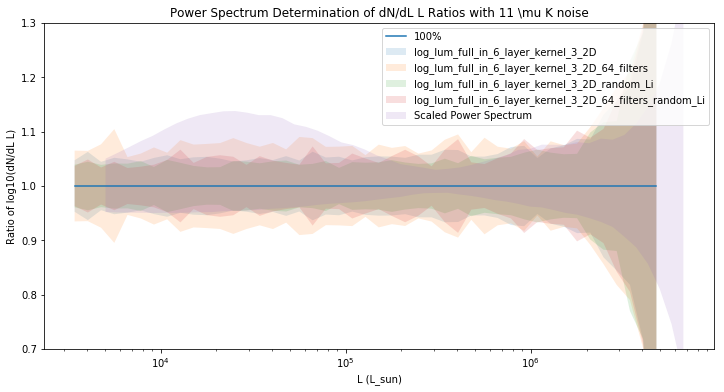

In [33]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D', 'log_lum_full_in_6_layer_kernel_3_2D_64_filters', 
                'log_lum_full_in_6_layer_kernel_3_2D_random_Li', 'log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li', 
                'Scaled Power Spectrum']
model_lowers = [log_lum_full_in_6_layer_kernel_3_2D_noise_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_noise_std, 
                log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_noise_std, 
                (1-lower_ratio2)/2]
model_uppers = [log_lum_full_in_6_layer_kernel_3_2D_noise_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_noise_std, 
                log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std, log_lum_full_in_6_layer_kernel_3_2D_64_filters_random_Li_noise_std, 
                (upper_ratio2-1)/2]
model_lums = [lumLogBinCents, lumLogBinCents, lumLogBinCents, lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums, white_noise=11)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:495: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(model_lums[0], model_lowers[0]/model_lowers[0], label='100%')


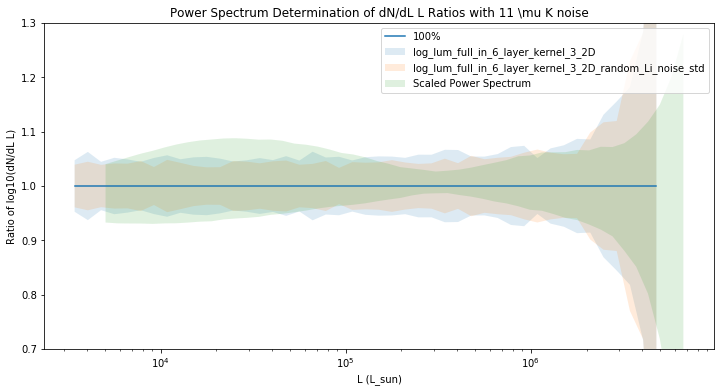

In [34]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D', 'log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std',
                'Scaled Power Spectrum']
model_lowers = [log_lum_full_in_6_layer_kernel_3_2D_noise_std, log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std, 
                (1-lower_ratio)/2]
model_uppers = [log_lum_full_in_6_layer_kernel_3_2D_noise_std, log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std, 
                (upper_ratio-1)/2]
model_lums = [lumLogBinCents, lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums, white_noise=11)

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:495: RuntimeWarning: invalid value encountered in true_divide
  plt.semilogx(model_lums[0], model_lowers[0]/model_lowers[0], label='100%')


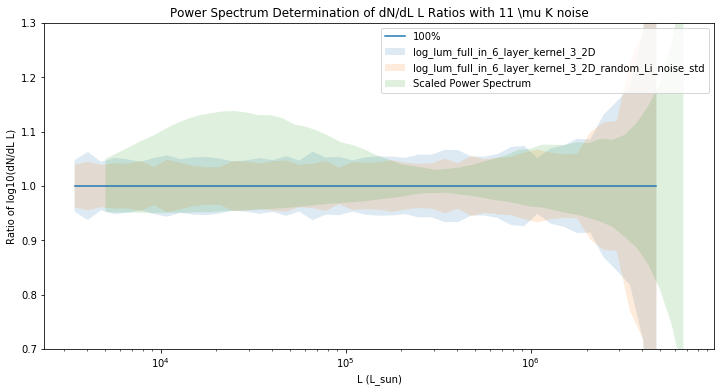

In [35]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D', 'log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std',
                'Scaled Power Spectrum']
model_lowers = [log_lum_full_in_6_layer_kernel_3_2D_noise_std, log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std, 
                (1-lower_ratio2)/2]
model_uppers = [log_lum_full_in_6_layer_kernel_3_2D_noise_std, log_lum_full_in_6_layer_kernel_3_2D_random_Li_noise_std, 
                (upper_ratio2-1)/2]
model_lums = [lumLogBinCents, lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums, white_noise=11)

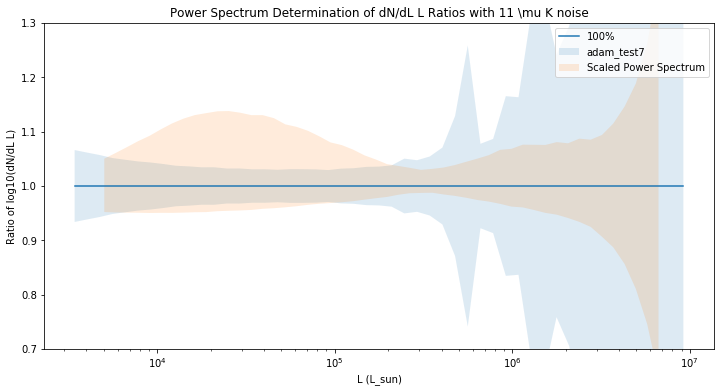

In [60]:
model_labels = ['adam_test7',
                'Scaled Power Spectrum']
model_lowers = [adam_test7_std, 
                (1-lower_ratio2)/2]
model_uppers = [adam_test7_std, 
                (upper_ratio2-1)/2]
model_lums = [lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums, white_noise=11)

In [58]:
%autoreload

In [59]:
adam_test7_std = lnn.std_of_model(adam_test7_res[2])

In [43]:
# print(adam_test7_std)
print(adam_test7_res[2][0])
print(adam_test7_res[1][0])
print(adam_test7_res[0][0])

[ 0.97324474  0.97377666  0.97676662  0.97881132  0.9805421   0.98150692
  0.9826431   0.98219018  0.98466635  0.98492814  0.98587864  0.98577115
  0.98555551  0.98576139  0.98528215  0.98581869  0.98866933  0.98240359
  0.98404032  0.98317975  0.98321999  0.98489481  0.98557297  0.97600993
  0.98147915  0.99110824  0.9825088   0.98094546  0.99131266  0.99802142
  1.00133981  1.00810424  1.0119544   1.00551047  1.02198567  1.0385139
  1.02399408  1.00616592  1.2866224   1.19322506  1.08684015  1.80038134
  2.12500095  1.47635933         inf         inf         inf         inf
        -inf]
[ 4.51787853  4.49685574  4.46523094  4.43129158  4.39033222  4.34200907
  4.29149723  4.23494148  4.18213511  4.11960268  4.06150913  3.99899197
  3.93809319  3.87757969  3.82160807  3.76420856  3.70717287  3.65388441
  3.60299873  3.55688286  3.50694013  3.45857239  3.41333055  3.3563602
  3.30370712  3.24182749  3.17619753  3.10551405  3.017313    2.92514992
  2.82725716  2.70930934  2.57823181  2

# STDs in real space not log space

In [24]:
#log_lum_full_in_6_layer_kernel_3_2D_res

temp_ratio = 10**(log_lum_full_in_6_layer_kernel_3_2D_res[1] - log_lum_full_in_6_layer_kernel_3_2D_res[0])
temp_std = lnn.std_of_model(temp_ratio)

temp_ratio

array([[ 1.60082906,  1.69216502,  1.39684361, ...,  0.73744911,
         1.21711887,  1.09134282],
       [ 1.48475929,  1.36252661,  1.04251965, ...,  0.71388506,
         1.17161562,  1.4249318 ],
       [ 1.6172018 ,  1.80849129,  1.66128999, ...,  0.38994022,
         1.34651382,  1.04300805],
       ..., 
       [ 1.20281   ,  1.06109564,  0.86698305, ...,  1.32786282,
         0.92091287,  1.21033533],
       [ 1.02594742,  1.22656367,  1.03098734, ...,  2.03913359,
         1.17761309,  0.53061792],
       [ 0.96400149,  1.12301119,  1.18252141, ...,  0.58281303,
         0.68104993,  1.05012525]])

In [25]:
temp_std

array([ 0.45057192,  0.47308964,  0.46918693,  0.32920433,  0.33486934,
        0.28859522,  0.47203826,  0.47216314,  0.40365956,  0.39649824,
        0.47141276,  0.44454733,  0.3849196 ,  0.33395803,  0.32094141,
        0.36747241,  0.42080219,  0.31452066,  0.527269  ,  0.29295211,
        0.27950465,  0.48474473,  0.36908283,  0.28239229,  0.20900821,
        0.43301276,  0.25486194,  0.28678927,  0.19270407,  0.27581512,
        0.23505208,  0.23842716,  0.18816331,  0.17371218,  0.36788249,
        0.18058994,  0.38888322,  0.20746941,  0.27454154,  0.21013957,
        0.22368093,  0.27625769,  0.24242919,  0.30564771,  0.35753315,
        0.49321739,  0.45744715,  0.33365659,  0.25282669])

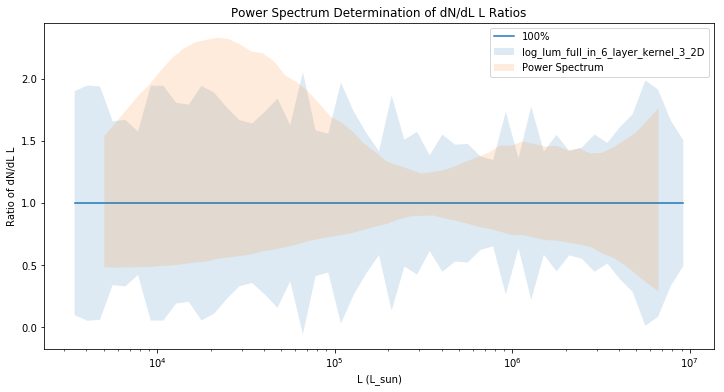

In [61]:
model_labels = ['log_lum_full_in_6_layer_kernel_3_2D',
                'Power Spectrum']
model_lowers = [temp_std, 
                (1-real_space_lower_ratio)/2]
model_uppers = [temp_std, 
                (real_space_upper_ratio-1)/2]
model_lums = [lumLogBinCents, upper_lum]

lnn.prediction_contour_plot(model_labels, model_lowers, model_uppers, model_lums, ratio_type='full', y_range=[])

In [63]:
log_lum_full_in_6_layer_kernel_3_2D_res[1][0]

array([ 4.88720274,  4.90105772,  4.80669546,  4.71085215,  4.9295907 ,
        4.71219969,  4.71564531,  4.84280777,  4.4432292 ,  4.57803297,
        4.55280256,  4.47338772,  4.27887249,  4.27529097,  4.14074278,
        4.170928  ,  4.02654648,  4.07975197,  4.03625917,  3.96459842,
        3.76852131,  3.881217  ,  3.71162319,  3.61573792,  3.64802718,
        3.75421286,  3.5902369 ,  3.52273798,  3.38276696,  3.4072628 ,
        3.32796335,  3.0619328 ,  2.97607541,  2.95871091,  2.9394753 ,
        2.75656915,  2.49559736,  2.30917239,  2.25240016,  1.96699286,
        1.84390247,  1.48398411,  1.35731614,  1.06553936,  0.8656323 ,
        0.46129641,  0.34485331,  0.085333  ,  0.0379612 ])

In [66]:
print(len(log_lum_full_in_6_layer_kernel_3_2D_res[1][0]))

print(len(lumLogBinCents))

49
49


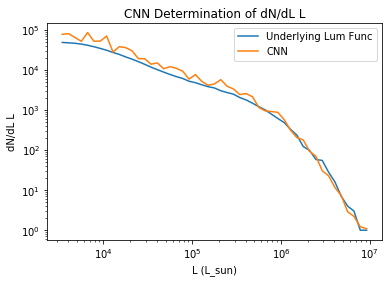

In [96]:
plt.loglog(lumLogBinCents, 10**log_lum_full_in_6_layer_kernel_3_2D_res[0][0], label='Underlying Lum Func')
plt.loglog(lumLogBinCents, 10**log_lum_full_in_6_layer_kernel_3_2D_res[1][0], label='CNN')
# plt.fill_between(upper_lum, lower_phi * 10**6, upper_phi * 10**6, alpha=0.15, color='k')

plt.xlabel('L (L_sun)')
plt.ylabel('dN/dL L')
plt.title('CNN Determination of dN/dL L')
plt.legend()

plt.show()

In [89]:
np.log10(10**log_lum_full_in_6_layer_kernel_3_2D_res[0][0][2] / simulated_phi[0])

6.3342749483296803

In [86]:
lumLogBinCents[2]

4770.5826961439325

In [82]:
upper_lum[0]

5043.1594871713587